<a href="https://colab.research.google.com/github/stevenfox/products_classification/blob/main/BrandMind_Stefanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification on shopping products using CNN with TF and Keras

  Classify a given product based on 29 categories.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



import os, shutil
import matplotlib.image as mpimg
import cv2
from imutils import paths
# import pickle
import random



Paths


In [10]:
drive_dataset_dir= '/content/drive/MyDrive/Colab Notebooks/BrandMind_Assessment/Products'
dataset_dir = '/content/products'

In [3]:
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

In [6]:
# copy folder to the google colab workplace
copytree(drive_dataset_dir, dataset_dir)

In [7]:
data = []
labels = []

In [11]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset_dir)))

In [12]:
#total number images
total_number_of_images = len(imagePaths)
print("Total number of images----->",total_number_of_images)
random.shuffle(imagePaths)

Total number of images-----> 9398


In [13]:
# loop over the shuffled input images
for imagePath in imagePaths:

  #Read the image into a numpy array using opencv
  #all the read images are of different shapes
  image = cv2.imread(imagePath)

  #resize the image to be 32x32 pixels (ignoring aspect ratio)
  #After reshape size of all the images will become 32x32x3
  #Total number of pixels in every image = 32x32x3=3072
  image = cv2.resize(image, (32, 32))

  #flatten converts every 3D image (32x32x3) into 1D numpy array of shape

  image_flatten = image.flatten()

  #Append each image data 1D array to the data list
  data.append(image_flatten)

  # extract the class label from the image path and update the
  label = imagePath.split(os.path.sep)[-2]
  #Append each image label to the labels list
  labels.append(label)
  # print(imagePath)
# scale the raw pixel intensities to the range [0, 1]
#convert the data and label list to numpy array
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [14]:
# partition the data into training, testing and validation splits using 60% of
# the data for training, 20% for testing and the remaining 20% for validating
# train_test_split is a scikit-learn's function which helps us to split images into three devisions of training, testing and validation respectively

(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=1) # initial split of 80% / 20%

(X_train, X_val, y_train, y_val )= train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


print("Amount of training images --->",len(X_train),",","Amount of training labels --->",len(y_train))
print("Amount of testing images --->",len(X_test),",","Amount of testing labels --->",len(y_test))
print("Amount of validating images --->",len(X_val),",","Amount of testing labels --->",len(y_val))


Amount of training images ---> 5638 , Amount of training labels ---> 5638
Amount of testing images ---> 1880 , Amount of testing labels ---> 1880
Amount of validating images ---> 1880 , Amount of testing labels ---> 1880


In [15]:
# convert the labels from integers to vectors 
# perform One hot encoding of all the labels using scikit-learn's function LabelBinarizer
# LabelBinarizer fit_transform finds all the labels

lb = preprocessing.LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)
valY = lb.transform(y_val)


In [16]:
print("\n")
print ("Classes found to train",)
train_classes = lb.classes_
print(train_classes)
binary_rep_each_class = lb.transform(train_classes)
print("Binary representation of each class")
print(binary_rep_each_class)
print("\n")



Classes found to train
['beanie' 'bikini' 'blazers' 'boat-shoes' 'boatneck-tops' 'bodysuit'
 'boots' 'bowtie' 'bracelets' 'business-suits' 'cami-tops' 'chelsea-boots'
 'coats' 'crop-tops' 'demin-jackets' 'earrings' 'evening-gowns' 'gloves'
 'hoodies' 'pumps' 'scarf' 'skirts' 'sneakers' 'stilettos' 'sunglasses'
 'trousers' 'tuxedos' 'waistcoat' 'wristwatch']
Binary representation of each class
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Deep learning libraries

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras import backend as K

#' ' means CPU whereas '/device:G:0' means GPU
tf.test.gpu_device_name()


'/device:GPU:0'

In [20]:
# dimensions of our images.
img_width, img_height = 150, 150

INIT_LR = 0.001
EPOCHS = 75
opt = SGD(lr=INIT_LR)
batch_size = 32

checkpoint = ModelCheckpoint('model-checkpoint.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  


model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))
model.add(Dense(len(train_classes), activation='sigmoid'))


model.compile(loss="categorical_crossentropy", 
              optimizer=opt,metrics=["accuracy"])


model_history = model.fit(X_train, trainY,
          epochs=EPOCHS,
          batch_size=batch_size,
          validation_data=(X_val, valY), 
          callbacks=[checkpoint])
model.save_weights('products_model.h5')
model.summary()

Epoch 1/75
177/177 [==============================] - 1s 5ms/step - loss: 3.3720 - accuracy: 0.0357 - val_loss: 3.3636 - val_accuracy: 0.0426
Epoch 2/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3669 - accuracy: 0.0373 - val_loss: 3.3596 - val_accuracy: 0.0383
Epoch 3/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3616 - accuracy: 0.0472 - val_loss: 3.3563 - val_accuracy: 0.0479
Epoch 4/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3635 - accuracy: 0.0355 - val_loss: 3.3533 - val_accuracy: 0.0473
Epoch 5/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3570 - accuracy: 0.0399 - val_loss: 3.3502 - val_accuracy: 0.0553
Epoch 6/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3531 - accuracy: 0.0491 - val_loss: 3.3469 - val_accuracy: 0.0569
Epoch 7/75
177/177 [==============================] - 1s 4ms/step - loss: 3.3511 - accuracy: 0.0491 - val_loss: 3.3438 - val_accuracy: 0.0564
Epoch 

[INFO] evaluating network...
                precision    recall  f1-score   support

        beanie       0.00      0.00      0.00        89
        bikini       0.00      0.00      0.00        58
       blazers       0.00      0.00      0.00        30
    boat-shoes       0.00      0.00      0.00        81
 boatneck-tops       0.00      0.00      0.00        67
      bodysuit       0.00      0.00      0.00        80
         boots       0.08      0.06      0.07        85
        bowtie       0.00      0.00      0.00        80
     bracelets       0.00      0.00      0.00        28
business-suits       0.00      0.00      0.00        41
     cami-tops       0.00      0.00      0.00        83
 chelsea-boots       0.38      0.84      0.52        73
         coats       0.00      0.00      0.00        70
     crop-tops       0.18      0.03      0.05        75
 demin-jackets       0.00      0.00      0.00        30
      earrings       0.29      0.69      0.41        65
 evening-gowns    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


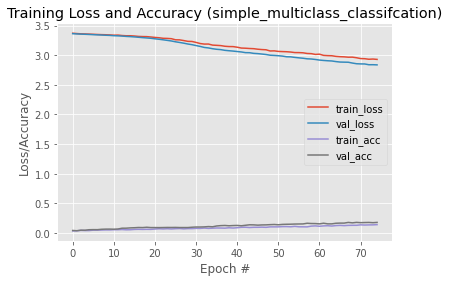

In [21]:

#evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

# print the performance report of the prediction
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_history.history["loss"], label="train_loss")
plt.plot(N, model_history.history["val_loss"], label="val_loss")
plt.plot(N, model_history.history["accuracy"], label="train_acc")
plt.plot(N, model_history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

## Transfer Learning

In [22]:
external_classifier = '/content/drive/MyDrive/Colab Notebooks/BrandMind_Assessment/91Model.h5'

AttributeError: ignored

In [ ]:
# instantiate a base model with pre-trained weights

base_model = keras.applications.Xception(
    weights= external_classifier,  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include 

In [ ]:
# freeze the base model
base_model.trainable = False

In [ ]:
checkpoint_T = ModelCheckpoint('model-checkpoint}.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(X_train, trainY, epochs=20, callbacks=[checkpoint_T], validation_data=(X_val, valY))